This notebook will review some statistics about our sp1 program performance. 

First of all, I will 
operate with instructions, not execution time, since this metric is hardware independent and can be
roughly converted to execution time for given hardware.


In [22]:
!pip install pandas matplotlib seaborn
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('hello')

/Users/viktarmakouski/.zshenv:6: command not found: brew

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip
hello


In [23]:
import glob

# Define the directory containing the JSON files
data_dir = 'metrics-cycles'

# Get a list of all JSON files in the directory
json_files = glob.glob(os.path.join(data_dir, '*.json'))

# Initialize an empty list to store the data
data_list = []

# Iterate over the files and read the data
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        data_list.append(data)

# Create a DataFrame
df = pd.DataFrame(data_list)

# Preview the DataFrame
df.head()


,total_instructions,acc_size,block_size,block_height,tx_count
0,18826673,222031,1493,2812,6
1,108225,16,215,1,1
2,1532599,13710,490,170,2
3,239966508,2884202,2183,38552,13
4,5202057,48191,1071,586,3


In [24]:
# Convert sizes from bytes to kilobytes
df['acc_size_kb'] = df['acc_size'] / 1024
df['block_size_kb'] = df['block_size'] / 1024

# Preview the updated DataFrame
df.head()



,total_instructions,acc_size,block_size,block_height,tx_count,acc_size_kb,block_size_kb
0,18826673,222031,1493,2812,6,216.827148,1.458008
1,108225,16,215,1,1,0.015625,0.209961
2,1532599,13710,490,170,2,13.388672,0.478516
3,239966508,2884202,2183,38552,13,2816.603516,2.131836
4,5202057,48191,1071,586,3,47.061523,1.045898


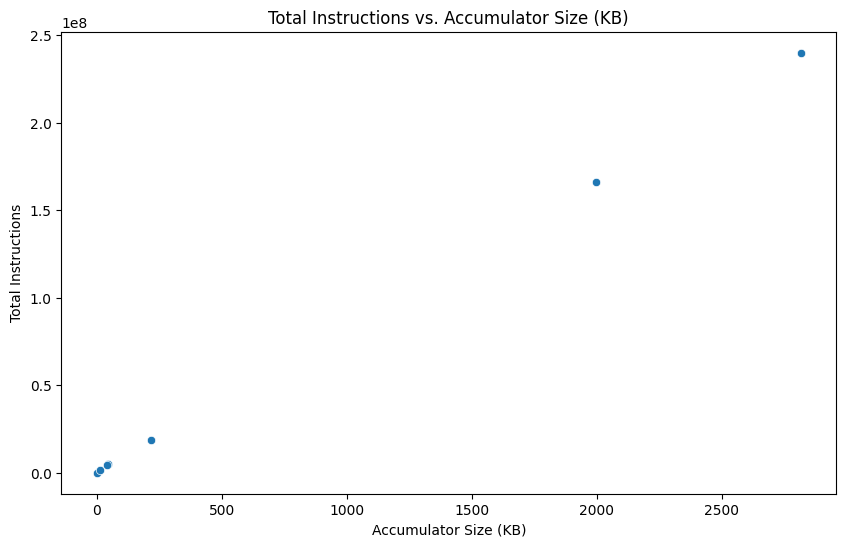

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acc_size_kb', y='total_instructions')
plt.title('Total Instructions vs. Accumulator Size (KB)')
plt.xlabel('Accumulator Size (KB)')
plt.ylabel('Total Instructions')
plt.show()


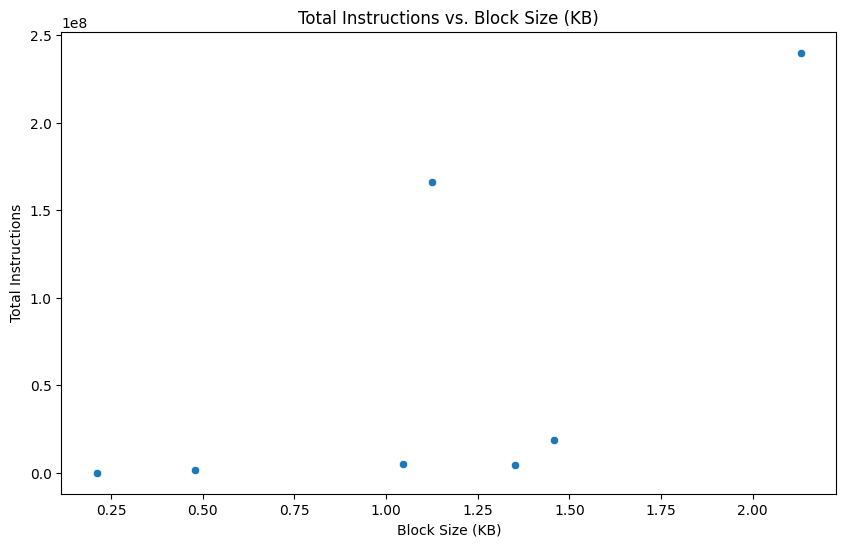

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='block_size_kb', y='total_instructions')
plt.title('Total Instructions vs. Block Size (KB)')
plt.xlabel('Block Size (KB)')
plt.ylabel('Total Instructions')
plt.show()


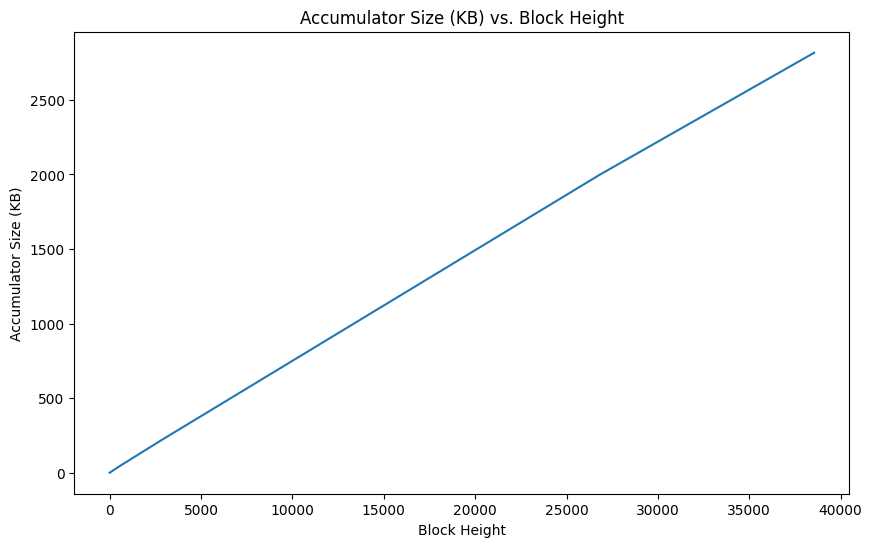

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.sort_values('block_height'), x='block_height', y='acc_size_kb')
plt.title('Accumulator Size (KB) vs. Block Height')
plt.xlabel('Block Height')
plt.ylabel('Accumulator Size (KB)')
plt.show()


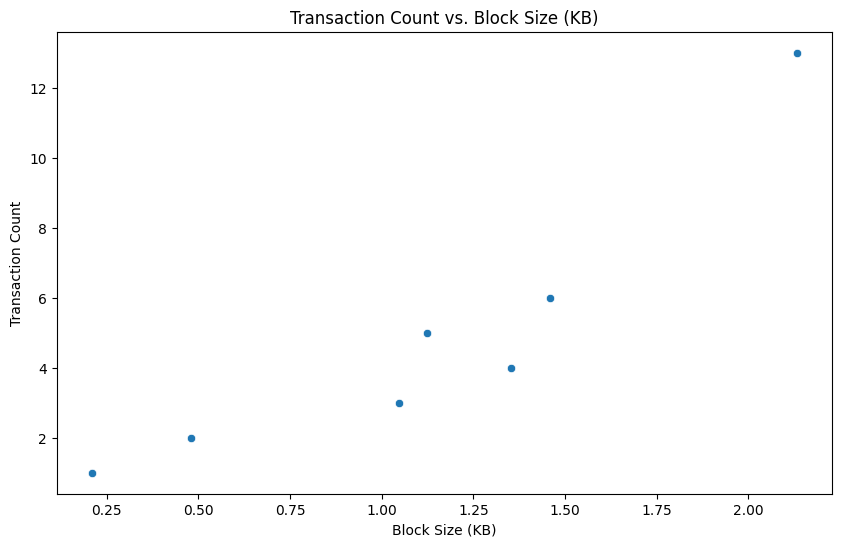

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='block_size_kb', y='tx_count')
plt.title('Transaction Count vs. Block Size (KB)')
plt.xlabel('Block Size (KB)')
plt.ylabel('Transaction Count')
plt.show()


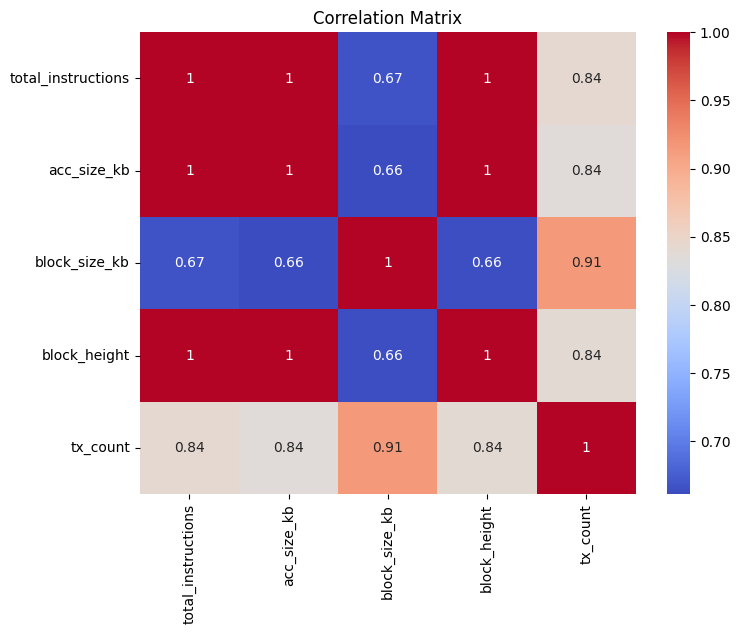

In [29]:
# Compute correlation matrix
corr = df[['total_instructions', 'acc_size_kb', 'block_size_kb', 'block_height', 'tx_count']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
